In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import sys
sys.path.append('/Users/liruancun/Works/GitHub/')
from astropy.stats import sigma_clipped_stats
from MorphSED.morphsed import image, image_atlas
import itertools
import glob


### 1.1 Prior function

In [2]:
def prior_func(s):
    def norm_with_fixed_sigma(x):
        return stats.norm.logpdf(x, 0, s)
    return norm_with_fixed_sigma

psfFWHM={
    'panstarrs.g_P1'   : 1.31, 
    'panstarrs.r_P1'   : 1.19, 
    'panstarrs.i_P1'   : 1.11, 
    'panstarrs.z_P1'   : 1.07, 
    'panstarrs.y_P1'   : 1.02, 
}
psfFWHM_list = [1.31, 1.19, 1.11, 1.07, 1.02]
#median image quality for the 3π survey is FWHM = (1.31, 1.19, 1.11, 1.07, 1.02) 

### 1.2 Input data

In [3]:
flist = sorted(glob.glob('data/NGC1400/*'))
image_list = [image(f, unit='adu') for f in flist]
band_list=['panstarrs.g_P1', 'panstarrs.r_P1', 'panstarrs.i_P1', 'panstarrs.z_P1', 'panstarrs.y_P1']
imgs = image_atlas(image_list=image_list, band_list=band_list, psfFWHM_list=psfFWHM_list)


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


In [4]:
imgs.source_detection()
imgs.make_common_catalog()


In [5]:
imgs.master_mask()
    

In [7]:
print (imgs.common_catalog)




                 scF                   sloop_1 ...      master_b     
               deg,deg                         ...                   
-------------------------------------- ------- ... ------------------
 54.90362779896988,-18.722049172252397       0 ... 1.3742076723493817
 54.91548138509727,-18.717412555027042       1 ...  1.862429215234233
 54.90056779129164,-18.709472683154864       2 ...  1.580970331028994
 54.85214537041983,-18.704017119156134       3 ... 2.8952591466757847
54.863241472101876,-18.704310800120954       4 ... 2.7613781181685835
 54.86519389528481,-18.701192061506536       7 ... 2.0397903803647512
54.878520285807774,-18.688226196945024      10 ...  45.59192968887977
 54.84321574194449,-18.696542816347332      17 ...      2.08642500302
 54.898798678028875,-18.68210355932589      36 ... 1.7123158665635398
 54.85834204476517,-18.680558929880753      39 ... 1.7790365782938702
54.899220440835094,-18.677441293185016      41 ... 2.2638826469605826
 54.92151556271786,-

### 1.3 Make mask

In [19]:
names  = ['%s_%s' % (profile, prop) for prop,profile in itertools.product(('xcen','ycen','mag','re','nser','ang','axrat','box'), ('sersic1','sersic2'))]
model0 = np.array((50, 50, 50, 50, 6.704, 6.2553, 10, 35, 3.0, 1.0, 180/np.pi-90, 180/np.pi-90, 1.,    0.5, 0,     0))
tofit  = np.array((True,  False, True,  False, True,  True,  True, True, True, False, True,  True,  True, True,  False,  False))
tolog  = np.array((False, False, False, False, False, False, True, True, True, True,  False, False, True,  True,  False, False))
#sigmas = np.ones_like(model0,dtype = float)
sigmas = np.array((2,     2,     2,     2,     5,     5,     1,    1,       1,    1,     30,    30,   0.3,   0.3,   0.3,   0.3))
lowers = np.array((0,     0,     0,     0,     10,    10,    0,    0,      -1,   -1,   -180,  -180,    -1,    -1,    -1,    -1))
uppers = np.array((1e3,   1e3,   1e3,   1e3,   30,    30,    2,    2,     1.3,  1.3,    360,   360, -0.01, -0.01,     1,     1))
priors = np.array([prior_func(s) for s in sigmas])

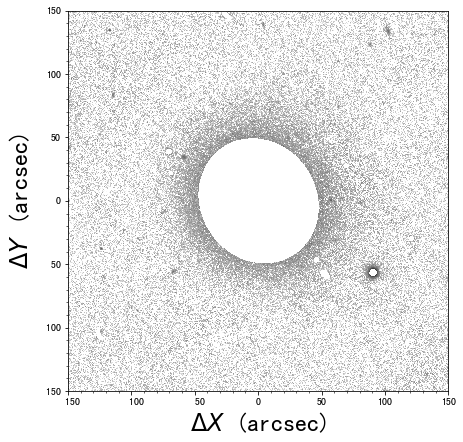

In [8]:
cat = img.sources_catalog


In [12]:
print (cat['ra'][0])


54.849682185454505


In [54]:
from astropy.table import Table, Column

In [55]:
tab = Table(cat)

In [58]:
print (tab['xcentroid'][0])

259.0860042988292


In [78]:
#from astropy.wcs import WCS
#wcs = WCS(img.data.header)



In [82]:
print (tab)

 id     xcentroid      ...         ra                 dec        
           pix         ...                                       
--- ------------------ ... ------------------ -------------------
  1  259.0860042988292 ...  54.90362779896988 -18.722049172252397
  2  97.22429850057149 ...  54.91548138509727 -18.717412555027042
  3 300.35353346782335 ...  54.90056779129164 -18.709472683154864
  4  960.6928712244602 ...  54.85214537041983 -18.704017119156134
  5  809.3386978858462 ... 54.863241472101876 -18.704310800120954
  6 332.17985365608484 ...  54.89821879878404  -18.70367190443531
  7  685.0765917546685 ...  54.87234424640713 -18.701782391585176
  8  782.5970853200528 ...  54.86519389528481 -18.701192061506536
  9  626.7936153413805 ...  54.87661416114755 -18.700793571776202
 10  616.4898057127036 ...  54.87736913550642 -18.700658704002468
...                ... ...                ...                 ...
 50  583.5700780875819 ...   54.8797172620004 -18.675876790219064
 51  601.3

In [70]:
hdu = fits.open(flist[0])

In [73]:
#print (hdu[0].header)
wcs = WCS(hdu[0].header)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
